In [1]:
import xarray as xr
import numpy as np
import warnings


('x', array([0.        , 0.06428571, 0.12857143, 0.19285714, 0.25714286,
       0.32142857, 0.38571429, 0.45      , 0.51428571, 0.57857143,
       0.64285714, 0.70714286, 0.77142857, 0.83571429, 0.9       ]))
('y', array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ,
       0.66, 0.72, 0.78, 0.84, 0.9 ]))
('z', array([0.     , 0.05625, 0.1125 , 0.16875, 0.225  , 0.28125, 0.3375 ,
       0.39375, 0.45   , 0.50625, 0.5625 , 0.61875, 0.675  , 0.73125,
       0.7875 , 0.84375, 0.9    ]))


In [2]:
@xr.register_dataarray_accessor("GridData")
class GridData(object):
    def __init__(self, data_array, grid):
        
        
        temp_data = np.zeros((len(grid.x),len(grid.y),len(grid.z)))
        temp_grid_data = xr.DataArray(data=temp_data,coords=[grid.x,grid.y,grid.z],
                                     dims=['x','y','z'])
        
        for key,coord in grid.items():
            if key in data_array.coords:
                if coord.max() > data_array.coords[key].max():
                    warnings.warn('{} coordinate exceeded the grid maximum. Data has been truncated.'.format(key))
                if coord.min() < data_array.coords[key].max():
                    warnings.warn('{} coordinate exceeded the grid minimum. Data has been truncated.'.format(key))

        interped = data_array.interp_like(temp_grid_data,method=method)
        resampled, temp = xr.broadcast(interped, temp_grid_data)
        
        self._obj = resampled
        
    def nx(self):
        return len(self._obj.coords['x'])
    
    def ny(self):
        return len(self._obj.coords['y'])
    
    def nz(self):
        return len(self._obj.coords['z'])

@xr.register_dataset_accessor("MicrophysicalScatterer") 
class MicrophysicalScatterer(object):
    def __init__(self, dataset, method='linear'):
        
        new_dataset = {}
        for name in dataset:
            resampled = dataset[name].GridData.resample(grid_coords,method=method)
            new_dataset[name] = resampled
            
        self._obj = xr.Dataset(new_dataset)


In [12]:
grid_data = xr.Dataset.GridData(data_array,grid)
#a = xr.Dataset.MicrophysicalScatterer(q,grid_coords)

/Library/anaconda3/envs/pyshdom-dev-refactor/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: x coordinate exceeded the grid minimum. Data has been truncated.
/Library/anaconda3/envs/pyshdom-dev-refactor/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: y coordinate exceeded the grid minimum. Data has been truncated.
/Library/anaconda3/envs/pyshdom-dev-refactor/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: z coordinate exceeded the grid minimum. Data has been truncated.
/Library/anaconda3/envs/pyshdom-dev-refactor/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: z coordinate exceeded the grid minimum. Data has been truncated.


In [6]:
xr.Dataset.MicrophysicalScatterer()

TypeError: __init__() missing 1 required positional argument: 'dataset'

In [3]:
#make some data
xs = np.linspace(0,1.0,15)
ys = np.linspace(0,1.0,16)
zs = np.linspace(0,1.0,17)

zs2 = np.linspace(0,1.2,32)

data = np.random.normal(size=(len(xs),len(ys),len(zs)))
data_1d = np.arange(len(zs2))

lwc = xr.DataArray(name='lwc',data=data,coords=[xs,ys,zs], dims=['x','y','z'])
reff = xr.DataArray(name='reff',data=data_1d,coords=[zs2],dims=['z'])



In [6]:
lwc.GridData.resample(grid_coords)

/Library/anaconda3/envs/pyshdom-dev-refactor/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: x coordinate exceeded the grid minimum. Data has been truncated.
/Library/anaconda3/envs/pyshdom-dev-refactor/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: y coordinate exceeded the grid minimum. Data has been truncated.
/Library/anaconda3/envs/pyshdom-dev-refactor/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: z coordinate exceeded the grid minimum. Data has been truncated.


<xarray.DataArray 'lwc' (x: 15, y: 16, z: 17)>
array([[[-1.18755472e+00,  1.02703306e+00, -4.15538688e-01, ...,
         -1.57420415e-01, -9.46200673e-01, -1.54031163e+00],
        [-1.10375290e-01,  3.27010265e-01, -9.96891601e-01, ...,
          1.42978561e+00,  1.35737464e+00,  2.07974959e-01],
        [-5.76426915e-01,  6.17284061e-01,  5.21136481e-01, ...,
          2.42557068e-01,  1.03276063e+00,  3.66452621e-01],
        ...,
        [ 3.21451772e-01, -4.80347216e-01,  1.01301821e+00, ...,
          1.58266671e-02, -3.84518793e-01, -4.69180042e-01],
        [-7.31071938e-02,  6.80924262e-01, -1.94856161e-01, ...,
          6.98436100e-01, -1.48608716e-01, -7.43498206e-01],
        [-3.26112206e-01,  1.25988494e+00, -6.16728186e-01, ...,
          4.24922296e-01,  2.21032653e-02, -1.63201741e-01]],

       [[ 1.13884596e+00,  7.60222384e-01,  1.15596767e+00, ...,
         -5.85477427e-01,  2.41254206e-01,  4.08080053e-01],
        [-4.72439267e-01, -1.41350755e+00, -5.57361707e-01, ...,
         -5.12613666e-01, -1.81841738e-02,  9.42351019e-01],
        [ 7.54173622e-01,  5.83120934e-01, -2.47337410e-01, ...,
         -3.54309487e-01,  5.39336665e-01,  1.01207798e+00],
        ...,
        [-7.81479945e-02,  3.00550253e-01, -3.89713775e-01, ...,
          8.99850564e-01,  1.16008749e+00,  7.04045513e-01],
        [ 1.05004321e+00, -1.70892253e-01, -5.87485564e-01, ...,
          4.19762269e-01,  7.25530271e-01,  3.78196359e-01],
        [ 1.27707053e+00, -3.20818279e-01,  2.85001724e-02, ...,
         -7.44350626e-01, -1.01786771e-01,  6.50751846e-02]],

       [[ 1.64086562e+00, -5.63058449e-01, -9.64277538e-01, ...,
          3.50317446e-01,  1.12260256e+00,  8.56099886e-01],
        [ 1.40079237e+00, -3.85252074e-02, -7.01187410e-01, ...,
         -1.31631952e-01, -8.82976677e-01, -5.76419584e-01],
        [ 7.99709977e-01, -3.64725625e-01, -5.78539725e-01, ...,
          9.25972490e-02, -6.10546858e-01, -2.13838865e-01],
        ...,
        [-5.05186715e-01, -8.26025862e-01, -2.74135201e-01, ...,
          7.28194684e-02,  3.81647524e-01,  4.55561947e-01],
        [-1.74596141e-01, -1.16266628e-01, -1.41917671e-02, ...,
          2.02676003e-02,  5.77682523e-01,  3.33708638e-01],
        [ 6.81005907e-01,  2.37809324e-01,  7.43327500e-03, ...,
         -3.96203776e-01,  1.18944868e-01,  4.23212459e-01]],

       ...,

       [[-1.25452180e-01, -7.72241602e-01, -7.78493140e-01, ...,
          4.53438797e-02, -1.51755481e-01, -2.21950044e-01],
        [-5.18878826e-01,  8.47165272e-01, -9.49134881e-01, ...,
          4.25672816e-01, -3.96482417e-01, -6.92200224e-01],
        [-7.87221222e-01, -1.05090619e+00, -1.09967627e-01, ...,
         -2.01280295e-02, -1.81956714e-01,  1.86425996e-01],
        ...,
        [-1.20827228e+00,  3.77127855e-01, -3.23088751e-01, ...,
         -3.61821378e-01, -5.25531274e-01, -3.67895308e-01],
        [-1.84206227e-01,  5.92869855e-01,  4.38922211e-02, ...,
         -7.44226329e-01,  3.03949298e-01,  1.83767409e-01],
        [ 2.20748826e-01, -1.62491517e-01,  3.93479510e-01, ...,
         -4.30533137e-01,  5.77415086e-01,  6.84558289e-01]],

       [[-4.87057936e-01, -1.42460077e-02,  4.11393660e-02, ...,
          1.71639843e-01, -1.20396490e-01, -4.15577668e-01],
        [-2.18627054e-01,  8.14873748e-01,  5.86097214e-01, ...,
          4.27287678e-01,  1.71219284e-01, -6.72622512e-01],
        [-1.16222651e+00, -2.08970365e-01,  5.70783904e-02, ...,
          7.28592256e-02, -4.41189762e-01,  4.43364832e-02],
        ...,
        [-8.99180069e-01, -2.75045389e-01, -9.03539805e-01, ...,
         -1.07789370e-03, -2.45293726e-01, -7.19408522e-01],
        [ 1.46913712e-01,  1.23786813e+00, -3.42903405e-01, ...,
          2.41094879e-01,  7.81680512e-01,  2.88687504e-01],
        [ 5.12536359e-01,  5.70910943e-01,  4.99753002e-01, ...,
          3.05602368e-01,  8.15528047e-01,  6.78560032e-01]],

       [[ 5.45507250e-01,  2.17614930e-01, -3.90390858e-01, ...,
         -7.13243473

In [4]:
#make fake DataArray based on the full grid's coordinates.


#grid_data.interp_like(fake_data).

#broadcast.
x = np.linspace(0,0.9,15)
y = np.linspace(0,0.9,16)
z = np.linspace(0,0.9,17)
grid_coords = {'x':x,'y':y,'z':z}
fake_data = np.zeros((len(x),len(y),len(z)))
fake_grid_data = xr.DataArray(data=fake_data,coords=[x,y,z],dims=['x','y','z'])


In [90]:
#make some data
xs = np.linspace(0,1.0,15)
ys = np.linspace(0,1.0,16)
zs = np.linspace(0,1.0,17)

zs2 = np.linspace(0,1.2,32)

data = np.random.normal(size=(len(xs),len(ys),len(zs)))
data_1d = np.arange(len(xs2))

lwc = xr.DataArray(name='lwc',data=data,coords=[xs,ys,zs], dims=['x','y','z'])
reff = xr.DataArray(name='reff',data=data_1d,coords=[zs2],dims=['z'])


In [96]:
lwc.interp_like({'x':x,'y':y,'z':z})

AttributeError: 'dict' object has no attribute 'indexes'

In [91]:
lwc_interped = lwc.interp_like(fake_grid_data,kwargs={'fill_value':0.0})
lwc_new, fake = xr.broadcast(lwc_interped,fake_grid_data)


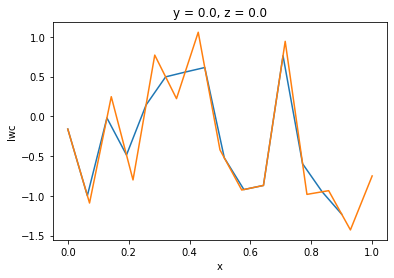

In [92]:
lwc_new.sel(y=0,z=0).plot()
lwc.sel(y=0,z=0).plot()

In [93]:
reff_interped = reff.interp_like(fake_grid_data,kwargs={'fill_value':0.0})
reff_new, fake = xr.broadcast(reff_interped,fake_grid_data)

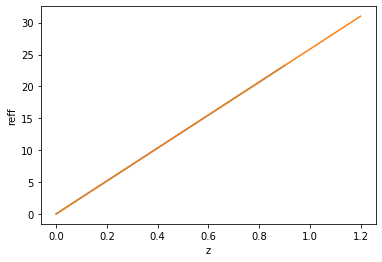

In [94]:
reff_new.sel(y=0,x=0).plot()
reff.plot()

In [52]:
reff_new = reff.interp_like(lwc)

In [57]:
reff,temp = xr.broadcast(reff_new,lwc)

In [58]:
reff

<xarray.DataArray 'reff' (x: 15, y: 16, z: 17)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 1.8452381 ,  1.8452381 ,  1.8452381 , ...,  1.8452381 ,
          1.8452381 ,  1.8452381 ],
        [ 1.8452381 ,  1.8452381 ,  1.8452381 , ...,  1.8452381 ,
          1.8452381 ,  1.8452381 ],
        [ 1.8452381 ,  1.8452381 ,  1.8452381 , ...,  1.8452381 ,
          1.8452381 ,  1.8452381 ],
        ...,
        [ 1.8452381 ,  1.8452381 ,  1.8452381 , ...,  1.8452381 ,
          1.8452381 ,  1.8452381 ],
        [ 1.8452381 ,  1.8452381 ,  1.8452381 , ...,  1.8452381 ,
          1.8452381 ,  1.8452381 ],
        [ 1.8452381 ,  1.8452381 ,  1.8452381 , ...,  1.8452381 ,
          1.8452381 ,  1.8452381 ]],

       [[ 3.69047619,  3.69047619,  3.69047619, ...,  3.69047619,
          3.69047619,  3.69047619],
        [ 3.69047619,  3.69047619,  3.69047619, ...,  3.69047619,
          3.69047619,  3.69047619],
        [ 3.69047619,  3.69047619,  3.69047619, ...,  3.69047619,
          3.69047619,  3.69047619],
        ...,
        [ 3.69047619,  3.69047619,  3.69047619, ...,  3.69047619,
          3.69047619,  3.69047619],
        [ 3.69047619,  3.69047619,  3.69047619, ...,  3.69047619,
          3.69047619,  3.69047619],
        [ 3.69047619,  3.69047619,  3.69047619, ...,  3.69047619,
          3.69047619,  3.69047619]],

       ...,

       [[22.14285714, 22.14285714, 22.14285714, ..., 22.14285714,
         22.14285714, 22.14285714],
        [22.14285714, 22.14285714, 22.14285714, ..., 22.14285714,
         22.14285714, 22.14285714],
        [22.14285714, 22.14285714, 22.14285714, ..., 22.14285714,
         22.14285714, 22.14285714],
        ...,
        [22.14285714, 22.14285714, 22.14285714, ..., 22.14285714,
         22.14285714, 22.14285714],
        [22.14285714, 22.14285714, 22.14285714, ..., 22.14285714,
         22.14285714, 22.14285714],
        [22.14285714, 22.14285714, 22.14285714, ..., 22.14285714,
         22.14285714, 22.14285714]],

       [[23.98809524, 23.98809524, 23.98809524, ..., 23.98809524,
         23.98809524, 23.98809524],
        [23.98809524, 23.98809524, 23.98809524, ..., 23.98809524,
         23.98809524, 23.98809524],
        [23.98809524, 23.98809524, 23.98809524, ..., 23.98809524,
         23.98809524, 23.98809524],
        ...,
        [23.98809524, 23.98809524, 23.98809524, ..., 23.98809524,
         23.98809524, 23.98809524],
        [23.98809524, 23.98809524, 23.98809524, ..., 23.98809524,
         23.98809524, 23.98809524],
        [23.98809524, 23.98809524, 23.98809524, ..., 23.98809524,
         23.98809524, 23.98809524]],

       [[25.83333333, 25.83333333, 25.83333333, ..., 25.83333333,
         25.83333333, 25.83333333],
        [25.83333333, 25.83333333, 25.83333333, ..., 25.83333333,
         25.83333333, 25.83333333],
        [25.83333333, 25.83333333, 25.83333333, ..., 25.83333333,
         25.83333333, 25.83333333],
        ...,
        [25.83333333, 25.83333333, 25.83333333, ..., 25.83333333,
         25.83333333, 25.83333333],
        [25.83333333, 25.83333333, 25.83333333, ..., 25.83333333,
         25.83333333, 25.83333333],
        [25.83333333, 25.83333333, 25.83333333, ..., 25.83333333,
         25.83333333, 25.83333333]]])
Coordinates:
  * x        (x) float64 0.0 0.07143 0.1429 0.2143 ... 0.7857 0.8571 0.9286 1.0
  * y        (y) float64 0.0 0.06667 0.1333 0.2 0.2667 ... 0.8 0.8667 0.9333 1.0
  *

In [41]:
lwc_aligned,reff_aligned = xr.align(lwc,reff,join='right',exclude=['y','z'])

In [43]:
reff_aligned

<xarray.DataArray 'reff' (x: 32)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])
Coordinates:
  * x        (x) float64 0.0 0.03871 0.07742 0.1161 ... 1.084 1.123 1.161 1.2

In [33]:
lwc_temp, reff_temp = xr.broadcast(lwc,reff)

In [34]:
lwc_temp

<xarray.DataArray 'lwc' (x: 46, y: 16, z: 17)>
array([[[ 0.58297077,  0.80509102, -0.3853345 , ..., -0.55790074,
          1.02536342,  0.13346883],
        [-1.4357548 ,  0.4876194 , -1.17785856, ..., -0.59681423,
          0.39410904, -2.34382889],
        [ 0.38389696, -0.10905074,  0.03709714, ..., -1.16620862,
         -0.65153583,  0.26069356],
        ...,
        [ 0.28539532,  1.94151122,  1.35536236, ...,  0.28453531,
          0.01328942, -0.5164996 ],
        [ 0.48703656,  1.09902078, -0.08607449, ...,  1.68296542,
         -1.34013559, -0.45546598],
        [-0.16241202, -0.07292345, -1.22621201, ...,  0.27896315,
         -1.20919044, -0.1097452 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[ 0.49045147,  0.68119675, -0.93398836, ..., -0.8717462 ,
         -0.35508193, -1.5382505 ],
        [ 0.59940244,  0.74464653,  1.4501067 , ..., -1.02819224,
         -0.5996217 , -1.01722977],
        [-1.54330758, -1.20906431, -0.86972756, ..., -0.87113077,
         -0.30520994, -1.89630205],
        ...,
        [-0.92311281,  0.49184124,  0.64512567, ..., -1.41140481,
         -0.93015989,  1.62046881],
        [-0.55492021,  0.92273465, -1.34406997, ...,  1.0750175 ,
          0.55852338,  0.1634664 ],
        [ 1.03765775, -0.58441488,  1.19178971, ..., -0.18163156,
         -0.82506912, -0.97481252]],

       ...,

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * x        (x) float64 0.0 0.03871 0.07143 0.07742 ... 1.084 1.123 1.161 1.2
  * y        (y) float64 0.0 0.06667 0.1333 0.2 0.2667 ... 0.8 0.8667 0.9333 1.0
  * z

In [37]:
reff_temp.interp(lwc_temp.coords)

<xarray.DataArray 'reff' (x: 46, y: 16, z: 17)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[29., 29., 29., ..., 29., 29., 29.],
        [29., 29., 29., ..., 29., 29., 29.],
        [29., 29., 29., ..., 29., 29., 29.],
        ...,
        [29., 29., 29., ..., 29., 29., 29.],
        [29., 29., 29., ..., 29., 29., 29.],
        [29., 29., 29., ..., 29., 29., 29.]],

       [[30., 30., 30., ..., 30., 30., 30.],
        [30., 30., 30., ..., 30., 30., 30.],
        [30., 30., 30., ..., 30., 30., 30.],
        ...,
        [30., 30., 30., ..., 30., 30., 30.],
        [30., 30., 30., ..., 30., 30., 30.],
        [30., 30., 30., ..., 30., 30., 30.]],

       [[31., 31., 31., ..., 31., 31., 31.],
        [31., 31., 31., ..., 31., 31., 31.],
        [31., 31., 31., ..., 31., 31., 31.],
        ...,
        [31., 31., 31., ..., 31., 31., 31.],
        [31., 31., 31., ..., 31., 31., 31.],
        [31., 31., 31., ..., 31., 31., 31.]]])
Coordinates:
  * x        (x) float64 0.0 0.03871 0.07143 0.07742 ... 1.084 1.123 1.161 1.2
  * y        (y) float64 0.0 0.06667 0.1333 0.2 0.2667 ... 0.8 0.8667 0.9333 1.0
  * z        (z) float64 0.0 0.0625 0.125 0.1875 ... 0.8125 0.875 0.9375 1.0

In [19]:
q = xr.merge([a,b])
q.interp(q.coords)

<xarray.Dataset>
Dimensions:  (x: 46, y: 16, z: 17)
Coordinates:
  * x        (x) float64 0.0 0.03871 0.07143 0.07742 ... 1.084 1.123 1.161 1.2
  * y        (y) float64 0.0 0.06667 0.1333 0.2 0.2667 ... 0.8 0.8667 0.9333 1.0
  * z        (z) float64 0.0 0.0625 0.125 0.1875 ... 0.8125 0.875 0.9375 1.0
Data variables:
    lwc      (x, y, z) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    reff     (x) float64 0.0 1.0 nan 2.0 3.0 nan ... 27.0 28.0 29.0 30.0 31.0

In [5]:
a_temp,b_temp = xr.broadcast(a,b)
a_new = a.interp(a_temp.coords)
b_new = b.interp({'x':a_temp.coords['x']})
a2,b2 = xr.broadcast(a_new,b_new)

In [6]:
a2

<xarray.DataArray 'lwc' (x: 46, y: 16, z: 17)>
array([[[-0.02529101, -0.88094432,  0.15357071, ..., -1.47771595,
          0.88878076,  1.52816132],
        [ 0.25696614, -1.85299429, -1.23965198, ...,  1.33214035,
          0.26266747, -0.17012233],
        [-1.02443583, -0.9128009 , -0.2878395 , ..., -2.05623759,
         -0.35892232, -1.03794963],
        ...,
        [-0.74443058,  1.2438338 , -0.90709704, ..., -1.82636572,
          1.30014998, -0.44006748],
        [ 1.16239866,  0.60700048,  2.08693971, ...,  0.62595293,
         -0.24184834, -0.88476638],
        [-0.79585595,  0.78211163,  0.39930616, ..., -0.48440462,
         -0.35778621,  2.31664657]],

       [[-0.13583251, -0.68132682,  0.42483916, ..., -1.45743617,
          0.88546153,  0.67900343],
        [ 0.53630989, -0.86324463,  0.19386762, ...,  0.01712498,
         -0.09859371,  0.00635794],
        [-0.47969113, -0.4123343 ,  1.50242106, ..., -1.16169371,
          0.10604262, -0.36997512],
        ...,
        [ 0.11791054,  0.77158292,  0.51398669, ..., -0.50319506,
          0.72462613, -0.29806513],
        [-0.40138161, -0.4030972 ,  2.16884539, ...,  0.69110085,
         -0.75249336, -0.31100831],
        [-0.85394448,  0.77994737,  0.52716636, ..., -0.04461203,
         -0.65632426,  1.02656281]],

       [[-0.22926641, -0.51260251,  0.6541256 , ..., -1.44029493,
          0.88265599, -0.03873716],
        [ 0.77242187, -0.02667051,  1.405533  , ..., -1.09437611,
         -0.40394543,  0.1555258 ],
        [-0.01925216,  0.01067914,  3.01561748, ..., -0.40559114,
          0.4990487 ,  0.19462239],
        ...,
        [ 0.8467941 ,  0.37241849,  1.71514079, ...,  0.61519918,
          0.23817145, -0.17803933],
        [-1.72314826, -1.25687023,  2.23807519, ...,  0.74616635,
         -1.18410998,  0.17395388],
        [-0.90304313,  0.77811806,  0.63523867, ...,  0.32711742,
         -0.90865999, -0.06386513]],

       ...,

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]])
Coordinates:
  * x        (x) float64 0.0 0.03871 0.07143 0.07742 ... 1.084 1.123 1.161 1.2
  * y        (y) float64 0.0 0.06667 0.1333 0.2 0.2667 ... 0.8 0.8667 0.9333 1.0
  * z

In [196]:
b2 = b.reindex_like(a)
a2 = a.reindex_like(b)



In [197]:
b2.coords['x']

<xarray.DataArray 'x' (x: 15)>
array([0.      , 0.071429, 0.142857, 0.214286, 0.285714, 0.357143, 0.428571,
       0.5     , 0.571429, 0.642857, 0.714286, 0.785714, 0.857143, 0.928571,
       1.      ])
Coordinates:
  * x        (x) float64 0.0 0.07143 0.1429 0.2143 ... 0.7857 0.8571 0.9286 1.0

In [198]:
a2.coords['x']

<xarray.DataArray 'x' (x: 32)>
array([0.      , 0.03871 , 0.077419, 0.116129, 0.154839, 0.193548, 0.232258,
       0.270968, 0.309677, 0.348387, 0.387097, 0.425806, 0.464516, 0.503226,
       0.541935, 0.580645, 0.619355, 0.658065, 0.696774, 0.735484, 0.774194,
       0.812903, 0.851613, 0.890323, 0.929032, 0.967742, 1.006452, 1.045161,
       1.083871, 1.122581, 1.16129 , 1.2     ])
Coordinates:
  * x        (x) float64 0.0 0.03871 0.07742 0.1161 ... 1.084 1.123 1.161 1.2

In [207]:
a_temp,b_temp = xr.broadcast(a,b)
a_new = a.interp(a_temp.coords)
b_new = b.interp({'x':a_temp.coords['x']})
a2,b2 = xr.broadcast(a_new,b_new)

In [210]:
b

<xarray.DataArray 'reff' (x: 46, y: 16, z: 17)>
array([[[ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        ...,
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ],
        [ 0.       ,  0.       ,  0.       , ...,  0.       ,
          0.       ,  0.       ]],

       [[ 1.       ,  1.       ,  1.       , ...,  1.       ,
          1.       ,  1.       ],
        [ 1.       ,  1.       ,  1.       , ...,  1.       ,
          1.       ,  1.       ],
        [ 1.       ,  1.       ,  1.       , ...,  1.       ,
          1.       ,  1.       ],
        ...,
        [ 1.       ,  1.       ,  1.       , ...,  1.       ,
          1.       ,  1.       ],
        [ 1.       ,  1.       ,  1.       , ...,  1.       ,
          1.       ,  1.       ],
        [ 1.       ,  1.       ,  1.       , ...,  1.       ,
          1.       ,  1.       ]],

       [[ 1.8452381,  1.8452381,  1.8452381, ...,  1.8452381,
          1.8452381,  1.8452381],
        [ 1.8452381,  1.8452381,  1.8452381, ...,  1.8452381,
          1.8452381,  1.8452381],
        [ 1.8452381,  1.8452381,  1.8452381, ...,  1.8452381,
          1.8452381,  1.8452381],
        ...,
        [ 1.8452381,  1.8452381,  1.8452381, ...,  1.8452381,
          1.8452381,  1.8452381],
        [ 1.8452381,  1.8452381,  1.8452381, ...,  1.8452381,
          1.8452381,  1.8452381],
        [ 1.8452381,  1.8452381,  1.8452381, ...,  1.8452381,
          1.8452381,  1.8452381]],

       ...,

       [[29.       , 29.       , 29.       , ..., 29.       ,
         29.       , 29.       ],
        [29.       , 29.       , 29.       , ..., 29.       ,
         29.       , 29.       ],
        [29.       , 29.       , 29.       , ..., 29.       ,
         29.       , 29.       ],
        ...,
        [29.       , 29.       , 29.       , ..., 29.       ,
         29.       , 29.       ],
        [29.       , 29.       , 29.       , ..., 29.       ,
         29.       , 29.       ],
        [29.       , 29.       , 29.       , ..., 29.       ,
         29.       , 29.       ]],

       [[30.       , 30.       , 30.       , ..., 30.       ,
         30.       , 30.       ],
        [30.       , 30.       , 30.       , ..., 30.       ,
         30.       , 30.       ],
        [30.       , 30.       , 30.       , ..., 30.       ,
         30.       , 30.       ],
        ...,
        [30.       , 30.       , 30.       , ..., 30.       ,
         30.       , 30.       ],
        [30.       , 30.       , 30.       , ..., 30.       ,
         30.       , 30.       ],
        [30.       , 30.       , 30.       , ..., 30.       ,
         30.       , 30.       ]],

       [[31.       , 31.       , 31.       , ..., 31.       ,
         31.       , 31.       ],
        [31.       , 31.       , 31.       , ..., 31.       ,
         31.       , 31.       ],
        [31.       , 31.       , 31.       , ..., 31.       ,
         31.       , 31.       ],
        ...,
        [31.       , 31.       , 31.       , ..., 31.       ,
         31.       , 31.       ],
        [31.       , 31.       , 31.       , ..., 31.       ,
         31.       , 31.       ],
        [31.       , 31.       , 31.       , ..., 31.       ,
         31.       , 31.       ]]])
Coordinates:
  * x        (x) float64 0.0 0.03871 0.07143 0.07742 ... 1.084 1.123 1.161 1.2
  * y        (y) float64 0.0 0.06667 0.1333 0.2 0.2667 ... 0.8 0.8667 0.9333 1.0
  * z        (z) float64 0.0 0.0625 0.125 0.1875 ... 0.8125 0.875 0.9375 1.0

In [154]:
b.interp({'x':ab.coords['x']})

<xarray.DataArray 'reff' (x: 46)>
array([ 0.        ,  1.        ,  1.8452381 ,  2.        ,  3.        ,
        3.69047619,  4.        ,  5.        ,  5.53571429,  6.        ,
        7.        ,  7.38095238,  8.        ,  9.        ,  9.22619048,
       10.        , 11.        , 11.07142857, 12.        , 12.91666667,
       13.        , 14.        , 14.76190476, 15.        , 16.        ,
       16.60714286, 17.        , 18.        , 18.45238095, 19.        ,
       20.        , 20.29761905, 21.        , 22.        , 22.14285714,
       23.        , 23.98809524, 24.        , 25.        , 25.83333333,
       26.        , 27.        , 28.        , 29.        , 30.        ,
       31.        ])
Coordinates:
  * x        (x) float64 0.0 0.03871 0.07143 0.07742 ... 1.084 1.123 1.161 1.2

In [126]:
a_temp,b_temp = xr.align(a,b,join='outer')

In [128]:
a_

<xarray.DataArray 'lwc' (x: 46, y: 16, z: 17)>
array([[[ 1.74848377e+00, -2.10098124e+00,  1.18210238e+00, ...,
         -2.08689713e-01, -7.35124841e-01, -4.73848862e-01],
        [-6.44715261e-01, -5.74579219e-01, -7.30929213e-01, ...,
         -7.13854578e-02, -4.21429029e-01,  1.36921616e+00],
        [-4.81471224e-01, -1.53729270e+00, -5.54858108e-01, ...,
          3.27678280e+00, -2.13824724e-01, -1.33259362e-01],
        ...,
        [ 3.80456505e-01, -2.32070633e+00,  9.53953448e-03, ...,
         -8.31168351e-01, -7.11456835e-01,  1.38394933e+00],
        [-5.65642425e-01, -4.20343900e-01,  1.25174712e+00, ...,
         -3.28717119e-01,  2.15372371e-01,  7.94874492e-02],
        [ 2.39998553e-01,  1.00388445e+00,  9.26645363e-01, ...,
         -3.81046522e-01,  1.30176277e-01,  2.11326373e-01]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 3.76604723e-01,  4.82400329e-01,  1.16586986e+00, ...,
          8.18511225e-01, -2.49293719e+00, -2.37495817e+00],
        [ 8.31864780e-01,  3.11023344e-01,  9.77638224e-02, ...,
          3.51510916e-01,  9.11784742e-01, -7.65718620e-03],
        [ 7.57559059e-02, -6.27912573e-01, -2.34794715e+00, ...,
         -3.57126332e-01,  1.53928295e+00,  5.28607333e-01],
        ...,
        [ 2.90438446e-01, -3.96798118e-02,  6.78392733e-01, ...,
         -1.77691611e+00,  6.06465363e-01,  3.65162544e-02],
        [-2.61757952e-01, -7.87789266e-01, -2.67824705e-01, ...,
          1.88360596e-01, -2.92536705e-01, -1.91315003e+00],
        [-1.49009449e+00, -1.07054627e-01, -2.34475045e-03, ...,
         -2.26309378e-01,  2.90597683e-01,  9.40175997e-01]],

       ...,

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                    

In [119]:
a.interp({'x':b.coords['x']})

<xarray.DataArray 'lwc' (x: 32, y: 16, z: 17)>
array([[[ 1.74848377e+00, -2.10098124e+00,  1.18210238e+00, ...,
         -2.08689713e-01, -7.35124841e-01, -4.73848862e-01],
        [-6.44715261e-01, -5.74579219e-01, -7.30929213e-01, ...,
         -7.13854578e-02, -4.21429029e-01,  1.36921616e+00],
        [-4.81471224e-01, -1.53729270e+00, -5.54858108e-01, ...,
          3.27678280e+00, -2.13824724e-01, -1.33259362e-01],
        ...,
        [ 3.80456505e-01, -2.32070633e+00,  9.53953448e-03, ...,
         -8.31168351e-01, -7.11456835e-01,  1.38394933e+00],
        [-5.65642425e-01, -4.20343900e-01,  1.25174712e+00, ...,
         -3.28717119e-01,  2.15372371e-01,  7.94874492e-02],
        [ 2.39998553e-01,  1.00388445e+00,  9.26645363e-01, ...,
         -3.81046522e-01,  1.30176277e-01,  2.11326373e-01]],

       [[ 1.00501384e+00, -7.00955098e-01,  1.17330540e+00, ...,
          3.47986924e-01, -1.68774573e+00, -1.50412745e+00],
        [ 1.55495858e-01, -9.46397653e-02, -2.81831052e-01, ...,
          1.57797093e-01,  3.01086821e-01,  6.23039636e-01],
        [-1.79490070e-01, -1.04446734e+00, -1.52659669e+00, ...,
          1.30743850e+00,  7.36246531e-01,  2.25429686e-01],
        ...,
        [ 3.31672525e-01, -1.08453712e+00,  3.72014816e-01, ...,
         -1.34370262e+00,  2.77196890e-03,  6.53727533e-01],
        [-4.00956646e-01, -6.19475582e-01,  4.28237229e-01, ...,
         -4.84943574e-02, -5.98815797e-02, -1.00039351e+00],
        [-6.97600256e-01,  4.01827142e-01,  4.23192656e-01, ...,
         -2.97188973e-01,  2.17114329e-01,  6.06315847e-01]],

       [[ 3.40617028e-01,  4.63144108e-01,  1.10810337e+00, ...,
          7.26880803e-01, -2.39312189e+00, -2.24956896e+00],
        [ 7.99894357e-01,  2.89623208e-01,  1.66716935e-01, ...,
          2.75835923e-01,  9.11496052e-01,  1.83334743e-02],
        [ 1.71593202e-01, -4.62814775e-01, -2.19908891e+00, ...,
         -3.42629005e-01,  1.42219145e+00,  4.71229296e-01],
        ...,
        [ 2.20885768e-01,  2.95277921e-02,  6.89859517e-01, ...,
         -1.78897711e+00,  5.04525155e-01,  2.20805287e-01],
        [-2.11288673e-01, -6.90214964e-01, -2.33675903e-01, ...,
          1.09638058e-01, -2.33458457e-01, -1.64343444e+00],
        [-1.40239401e+00, -6.20133576e-03,  4.88397565e-02, ...,
         -1.71369308e-01,  3.35639282e-01,  8.84607611e-01]],

       ...,

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                    

In [117]:
a2

<xarray.DataArray 'lwc' (x: 46, y: 16, z: 17)>
array([[[ 1.74848377e+00, -2.10098124e+00,  1.18210238e+00, ...,
         -2.08689713e-01, -7.35124841e-01, -4.73848862e-01],
        [-6.44715261e-01, -5.74579219e-01, -7.30929213e-01, ...,
         -7.13854578e-02, -4.21429029e-01,  1.36921616e+00],
        [-4.81471224e-01, -1.53729270e+00, -5.54858108e-01, ...,
          3.27678280e+00, -2.13824724e-01, -1.33259362e-01],
        ...,
        [ 3.80456505e-01, -2.32070633e+00,  9.53953448e-03, ...,
         -8.31168351e-01, -7.11456835e-01,  1.38394933e+00],
        [-5.65642425e-01, -4.20343900e-01,  1.25174712e+00, ...,
         -3.28717119e-01,  2.15372371e-01,  7.94874492e-02],
        [ 2.39998553e-01,  1.00388445e+00,  9.26645363e-01, ...,
         -3.81046522e-01,  1.30176277e-01,  2.11326373e-01]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[ 3.76604723e-01,  4.82400329e-01,  1.16586986e+00, ...,
          8.18511225e-01, -2.49293719e+00, -2.37495817e+00],
        [ 8.31864780e-01,  3.11023344e-01,  9.77638224e-02, ...,
          3.51510916e-01,  9.11784742e-01, -7.65718620e-03],
        [ 7.57559059e-02, -6.27912573e-01, -2.34794715e+00, ...,
         -3.57126332e-01,  1.53928295e+00,  5.28607333e-01],
        ...,
        [ 2.90438446e-01, -3.96798118e-02,  6.78392733e-01, ...,
         -1.77691611e+00,  6.06465363e-01,  3.65162544e-02],
        [-2.61757952e-01, -7.87789266e-01, -2.67824705e-01, ...,
          1.88360596e-01, -2.92536705e-01, -1.91315003e+00],
        [-1.49009449e+00, -1.07054627e-01, -2.34475045e-03, ...,
         -2.26309378e-01,  2.90597683e-01,  9.40175997e-01]],

       ...,

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan]],

       [[            nan,             nan,             nan, ...,
                    

In [104]:



a2 = a.interp({'x':b.coords['x']})#.expand_dims(['y','z'],axis=(-2,-1))

q2,a2 = xr.broadcast(q2,a2)

In [105]:


dataset = xr.Dataset({a.name: a, q2.name: q2})
#reff_interp_test = dataset['reff'].interp({'x':a.coords['x']})

In [106]:
dataset

<xarray.Dataset>
Dimensions:  (x: 46, y: 16, z: 17)
Coordinates:
  * x        (x) float64 0.0 0.03871 0.07143 0.07742 ... 1.084 1.123 1.161 1.2
  * y        (y) float64 0.0 0.06667 0.1333 0.2 0.2667 ... 0.8 0.8667 0.9333 1.0
  * z        (z) float64 0.0 0.0625 0.125 0.1875 ... 0.8125 0.875 0.9375 1.0
Data variables:
    lwc      (x, y, z) float64 -0.9423 0.008489 0.7222 -0.3564 ... nan nan nan
    reff     (x, y, z) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan nan

In [42]:
b = xr.DataArray(name='reff',data=data_1d,coords=[xs2],dims=['x'])

In [45]:
new = xr.merge([a,b])

array([0.        , 0.03870968, 0.07741935, 0.11612903, 0.15483871,
       0.19354839, 0.23225806, 0.27096774, 0.30967742, 0.3483871 ,
       0.38709677, 0.42580645, 0.46451613, 0.50322581, 0.54193548,
       0.58064516, 0.61935484, 0.65806452, 0.69677419, 0.73548387,
       0.77419355, 0.81290323, 0.8516129 , 0.89032258, 0.92903226,
       0.96774194, 1.00645161, 1.04516129, 1.08387097, 1.12258065,
       1.16129032, 1.2       ])

In [56]:
new.coords['x']

<xarray.DataArray 'x' (x: 46)>
array([0.      , 0.03871 , 0.071429, 0.077419, 0.116129, 0.142857, 0.154839,
       0.193548, 0.214286, 0.232258, 0.270968, 0.285714, 0.309677, 0.348387,
       0.357143, 0.387097, 0.425806, 0.428571, 0.464516, 0.5     , 0.503226,
       0.541935, 0.571429, 0.580645, 0.619355, 0.642857, 0.658065, 0.696774,
       0.714286, 0.735484, 0.774194, 0.785714, 0.812903, 0.851613, 0.857143,
       0.890323, 0.928571, 0.929032, 0.967742, 1.      , 1.006452, 1.045161,
       1.083871, 1.122581, 1.16129 , 1.2     ])
Coordinates:
  * x        (x) float64 0.0 0.03871 0.07143 0.07742 ... 1.084 1.123 1.161 1.2

In [69]:
new2 = b.combine_first(a)

In [74]:
new2[2]

<xarray.DataArray 'reff' (y: 16, z: 17)>
array([[ 1.25830528e+00,  9.42694963e-01, -1.21963872e+00,
         1.46923945e+00,  1.08082215e+00,  1.22128677e+00,
        -1.21775920e+00,  1.86886255e+00,  1.26587677e+00,
        -1.48642881e+00, -2.80487612e-01, -3.90291889e-01,
         6.62228239e-01,  8.17975747e-01, -1.36590883e-01,
        -1.61280087e+00, -9.80509860e-01],
       [-6.53659059e-01,  1.34168328e-01,  3.24448623e-01,
         1.22111284e+00,  1.56163156e+00, -4.68906219e-01,
        -7.59086806e-01, -2.15931238e+00,  1.08345118e+00,
        -7.31787954e-01,  9.84876177e-01, -1.71045237e+00,
         4.38234817e-01,  1.19995581e+00,  1.14232462e+00,
         5.28472263e-01, -6.94899848e-01],
       [ 2.25529670e-01,  7.56189038e-01,  8.53668496e-01,
         7.08884916e-01, -1.51094282e-01,  9.93361491e-01,
        -8.29997599e-02, -2.24058602e+00, -1.23346364e+00,
        -3.22603721e-01,  1.84813985e+00, -2.23351981e+00,
        -2.10105394e-01, -1.30387830e+00, -6.88114779e-01,
         9.25254017e-01, -8.41970168e-02],
       [-6.03070308e-01, -3.67016565e-01, -1.55615052e+00,
         1.11603346e+00,  2.71643870e+00,  2.16246670e+00,
         5.12211218e-01, -3.97903153e-01, -1.00969442e-01,
         7.11811788e-01,  1.46537863e+00, -9.41120942e-01,
        -5.34846569e-01,  1.96482209e-01,  1.73421149e+00,
        -9.31128316e-01, -5.01348852e-01],
       [-1.27726931e+00,  6.66692239e-01, -2.48060383e-01,
        -9.78527749e-01,  7.20749663e-01, -1.29689084e+00,
         7.94349635e-01, -1.59421985e-01,  7.74139487e-01,
        -1.33723356e+00, -1.33983765e-02, -6.60330089e-01,
        -2.12794761e+00,  4.57279572e-01, -1.80945764e+00,
         1.00524904e+00,  2.64758180e-01],
       [ 7.93673979e-02,  3.50196097e+00,  2.77515567e-01,
         2.29688138e+00,  2.84625970e-01, -2.83459211e-01,
         2.47518442e-01,  2.54617886e-01,  9.99326371e-01,
         5.67662096e-01, -2.21863905e+00,  2.07441852e+00,
        -3.09172284e-01, -7.33740914e-01, -1.18431689e+00,
        -4.50775638e-01,  1.35982630e+00],
       [ 1.96024497e-01, -4.21106326e-01, -1.14319629e+00,
        -7.04894959e-01, -9.53631994e-01,  5.11301413e-01,
         1.17137722e-01,  1.54761353e+00,  3.19806621e-01,
        -1.73583635e+00,  1.89421980e-01,  1.57357653e-01,
        -1.51144065e+00,  4.48384787e-01, -1.73368942e-01,
         1.74279206e+00,  4.28964527e-03],
       [-1.88377306e+00, -1.32217769e+00,  1.57163867e+00,
        -4.98589192e-02, -1.16352999e+00, -7.91842811e-01,
         6.75933100e-01, -1.12264034e-02,  4.96353396e-01,
         9.82669926e-01, -6.44955364e-02,  9.19975305e-01,
        -3.34796081e-01, -2.07002305e-01,  2.68257478e-01,
        -1.78384286e+00,  1.02984400e+00],
       [ 1.43573682e+00, -2.57735981e-01, -2.87880264e-01,
        -1.91100326e-03,  1.13593162e+00,  3.56847632e-01,
        -5.78056622e-02, -7.06417874e-01, -7.45704640e-01,
        -5.41258241e-01,  1.92195236e+00,  4.57060608e-01,
         7.92996202e-01,  2.11685954e-01, -1.41453834e+00,
         7.03623985e-01,  7.77620408e-01],
       [ 1.99615878e-02, -2.14449555e-01, -1.68322602e+00,
        -1.33036559e-01,  9.58575216e-02, -4.70520821e-01,
        -4.30465732e-01, -4.84951611e-01, -2.06962410e-01,
        -6.67317560e-02,  3.23273923e-01, -6.15455877e-01,
        -7.89882406e-01,  2.26982182e-01,  5.38236997e-01,
         1.74771059e+00, -8.86808079e-01],
       [-1.62884018e+00, -5.73427014e-01,  4.46649149e-02,
        -9.37903271e-01,  9.52996678e-01,  1.17209631e+00,
         1.22615413e+00, -1.43556939e+00, -2.89578253e-01,
        -6.44153100e-01,  1.34795789e+00, -4.71965599e-01,
         1.48041839e+00,  1.97990011e+00, -1.28690433e+00,
         1.01796737e+00,  1.35081085e-01],
       [-4.86714439e-01,  4.05807304e-01,  1.63660377e+00,
        -4.85738414e-01,  6.82106529e-01, -2.17199084e+00,
         7.58456920e-01,  8.54997553e-01,  9.06315078e-01,
         6.31724017e-01,  4.81335468e-01,  1.53688303e-01,
     